# Pandas часть 1. Домашнее Задание. Ultra pro

*2 балла за каждую задачу*

Представим ситуацию: Вы заказали базу у фрилансеров. Им необходимо было скачать с сайтов двух отелей анонимную базу данных обо всех клиентах. Фрилансеры выполнили заказ и прислали работу. Как оказалось, исходные данные очень загрязнены (пустыми колонками, неинформативными строками и т. д.), да еще и представлены в виде нескольких различных файлов. Главная задача на всё ДЗ - очистить базу и сохранить в виде одного документа.

Ссылка на файлы:
https://drive.google.com/drive/folders/12aykvz02214Q_7eNMm3loXzOIDXfeZ4b?usp=sharing

Лучше сохранить на свой Google Диск

In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Задание 1
*(2 балла)*


Подключите Google Drive.

Откройте папку с файлами и сохраните каждый из них в виде Pandas DataFrame.

**Подсказка 1**: получить список имен файлов можно при помощи библиотеки os, командой os.listdir (путь к папке с файлами).

**Подсказка 2**: для сохранения всех файлов в виде Pandas DataFrame удобно использовать одну из структур данных Python.

Объедините все Pandas DataFrame в один.

**Решение:**

In [ ]:
listdir = os.listdir('/content/drive/My Drive/bookings')
ldf = []
for i in listdir:
  ldf.append(pd.read_csv('/content/drive/My Drive/bookings/' + str(i)))
df = pd.concat(ldf)
df

,Unnamed: 0,test_values,Unnamed: 2,for_notes,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,cashe,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,NaN,NaN,NaN,Resort Hotel,0.0,342.0,2015.0,July,NaN,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
1,1,NaN,NaN,NaN,For notes:,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,Resort Hotel,0.0,7.0,2015.0,July,NaN,...,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
3,3,NaN,NaN,NaN,For notes:,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,Resort Hotel,0.0,14.0,2015.0,July,NaN,...,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23873,238775,NaN,NaN,NaN,For notes:,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23874,238776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23875,238777,NaN,NaN,NaN,For notes:,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23876,238778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Задание 2
*(2 балла)*

Хорошо бы понимать, с какими данными мы работаем.

Узнайте размерность получившегося DataFrame (число столбцов и число строк).

Проверьте, выведя график, есть ли пропуски в данных. Оцените, насколько их много.

**Решение:**

In [ ]:
df.shape

(238780, 37)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

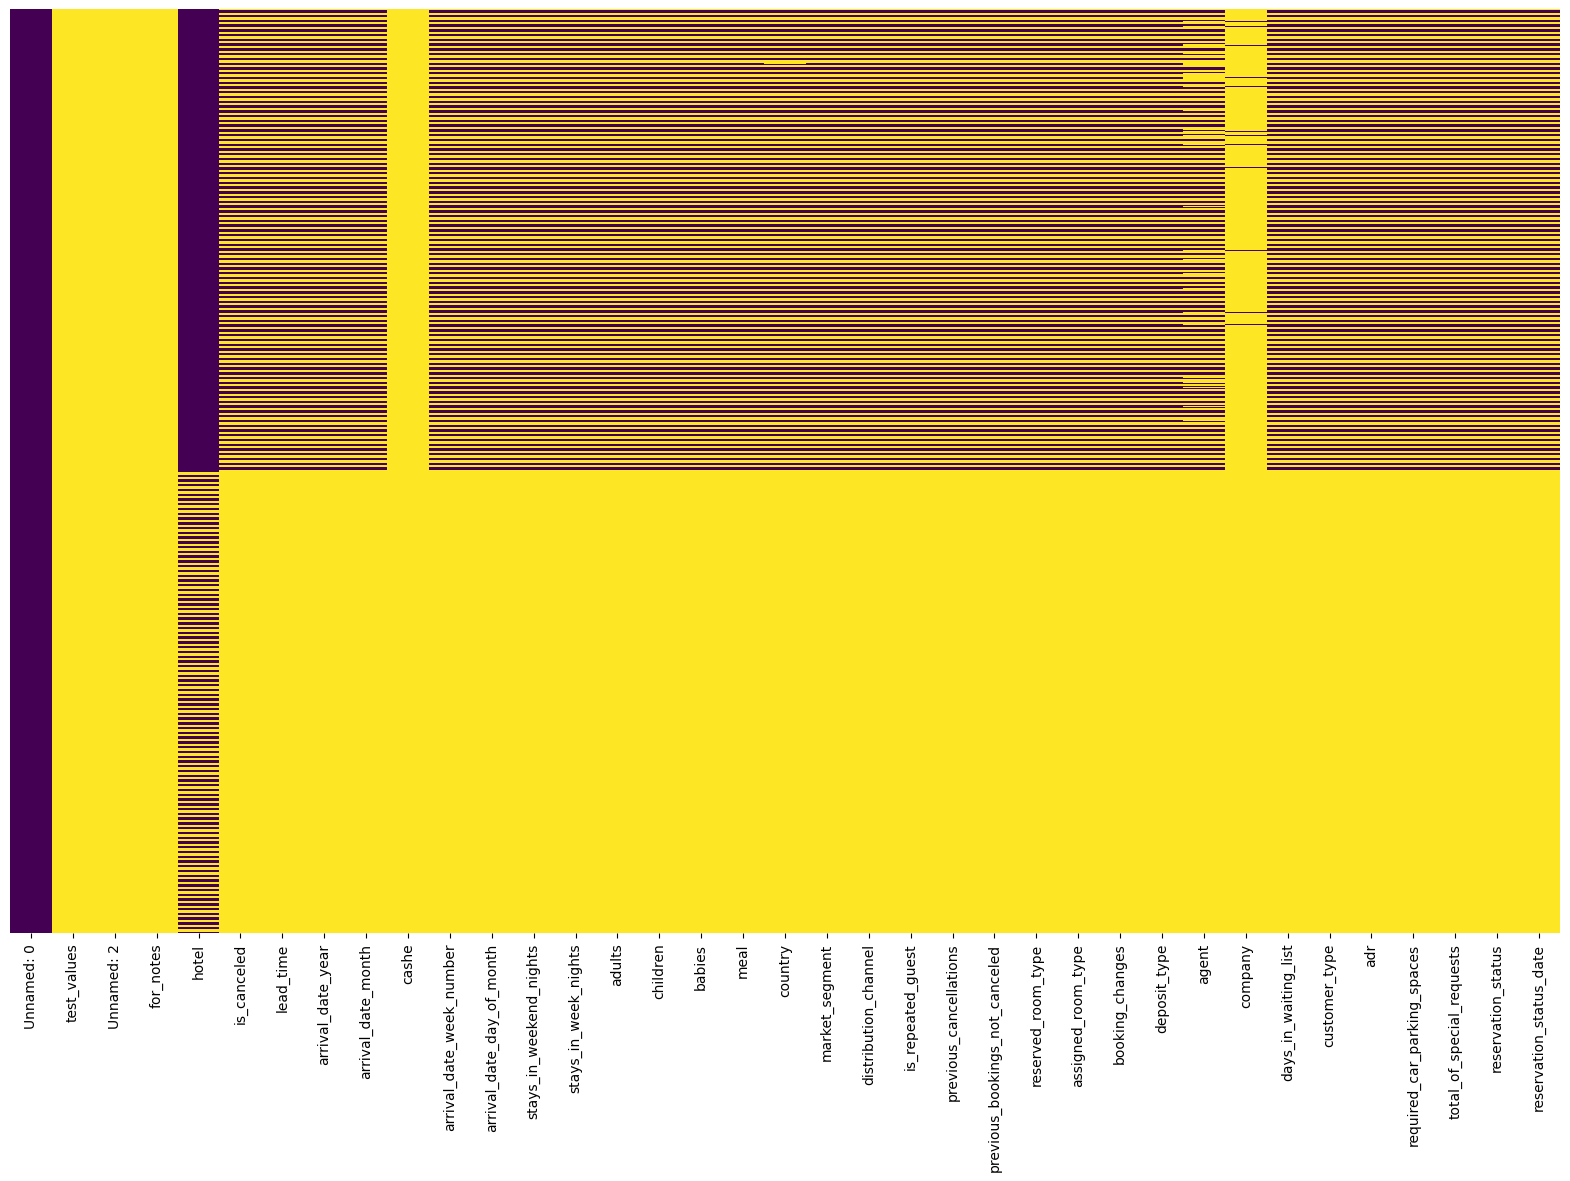

In [ ]:
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

### Задание 3
*(2 балла)*

Основываясь на выводах из предыдущего задания, очистите данные от пропусков.

**Подсказка**: очевидно, что есть полностью пустые столбцы, неинформативные строки с одним лишь значением "For notes:", пустая часть датасета внизу. После этих преобразований могут остаться пустые значения в датасете с хаотичным расположением (это допускается).

Если остались пропуски, заполните их словом "unknown".

**Решение:**

In [ ]:
df = df[df.columns[4:]]

In [ ]:
df = df.drop(labels='cashe', axis = 1)


In [ ]:
df = df[::2]

In [ ]:
df = df.dropna(axis = 0, how = 'all')

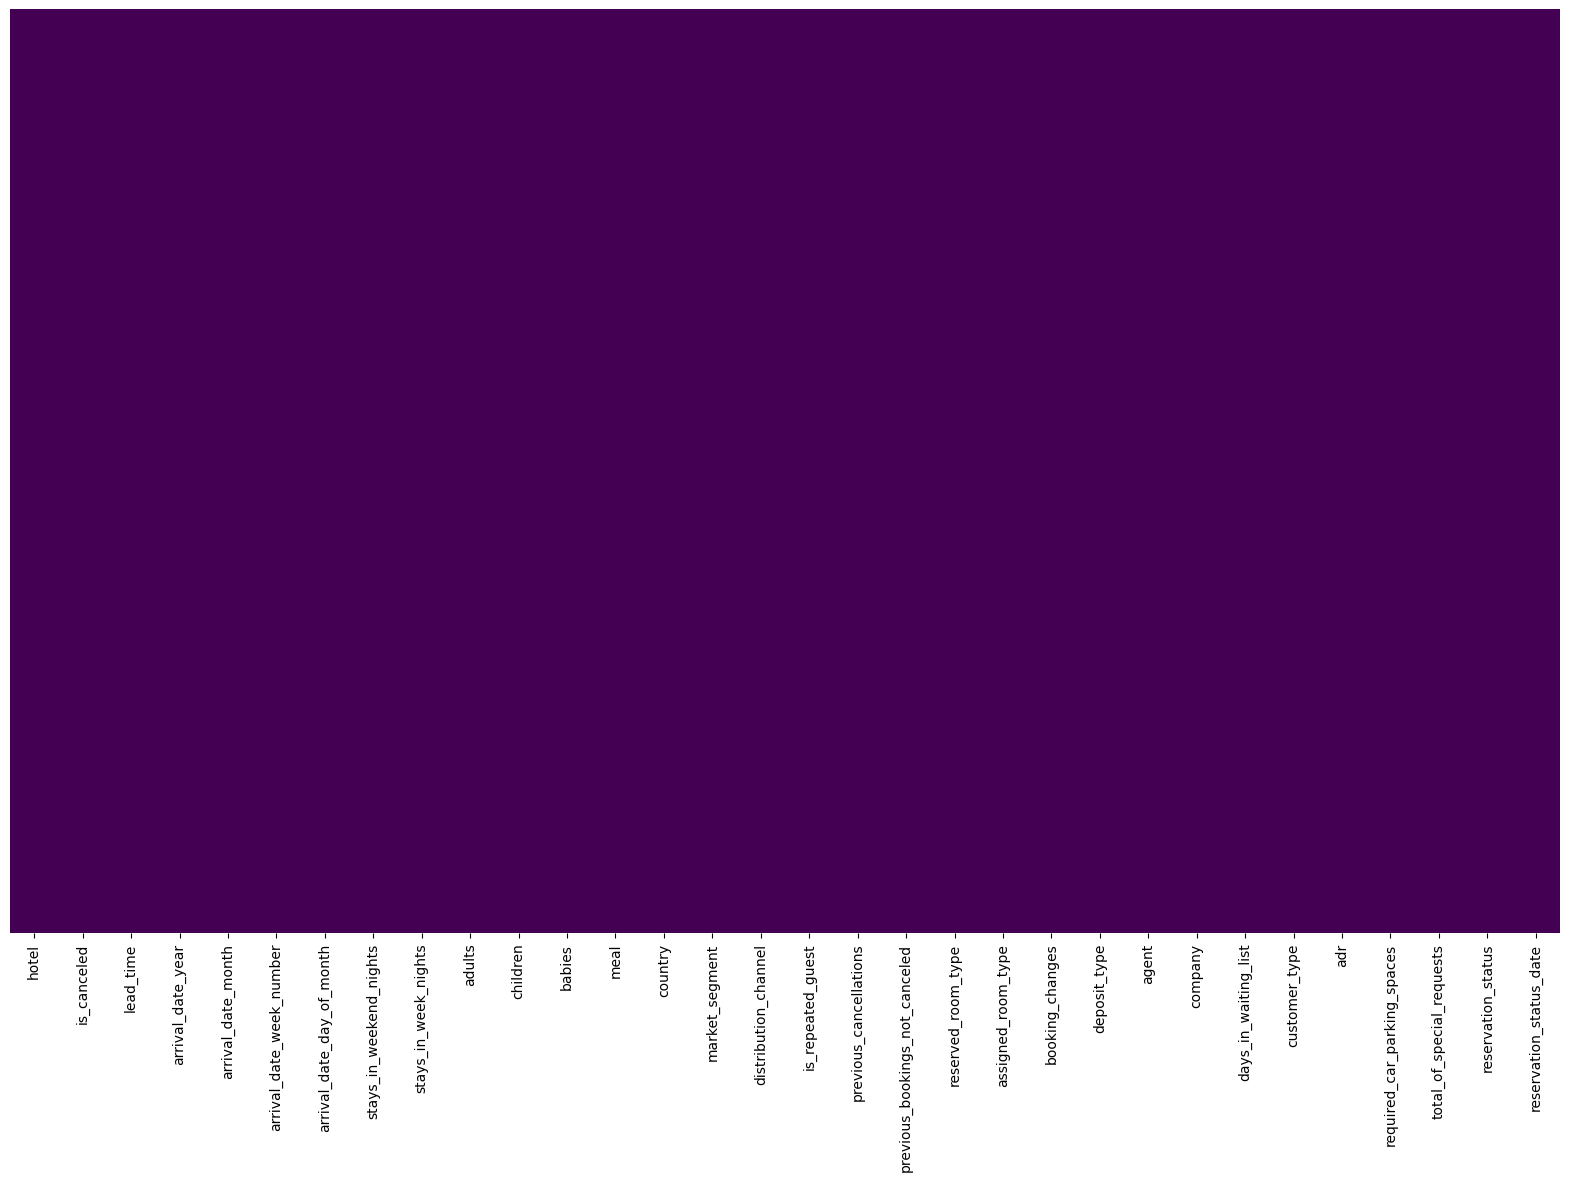

In [ ]:
df = df.fillna('unknown')

fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

### Задание 4
*(2 балла)*

Необходимо посмотреть, сколько всего записей есть в столбце 'lead_time' по каждому отелю, за каждый год и каждый месяц каждого года.

**Подсказка**: примените метод groupby для столбцов 'hotel', 'arrival_date_year', 'arrival_date_month'.

**Решение:**

In [ ]:
df_ = df.groupby(['hotel', 'arrival_date_year', 'arrival_date_month']).count()
df_['lead_time']

hotel         arrival_date_year  arrival_date_month
City Hotel    2015.0             August                1235
                                 December               829
                                 July                   703
                                 November               617
                                 October               1696
                                 September             1767
              2016.0             April                 1781
                                 August                1689
                                 December              1242
                                 February              1179
                                 January                683
                                 July                  1560
                                 June                  1962
                                 March                 1529
                                 May                   1846
                                 November       

### Задание 5
*(2 балла)*

Узнайте размерность получившегося DataFrame (число столбцов и число строк).

Сохраните получившийся DataFrame в одном файле.

**Решение:**

In [ ]:
print(df.shape[0])
print(df.shape[1])

df.to_csv('new_dataframe.csv')

59695
32
